### Gerry William Nanlohy / 2440018854 / LB01 / Assignment 04

##### Importing Data from Various Sources

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt

##### Reading Excel Files

In [2]:
dataset = pd.read_csv('fish.csv')
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
dataset.shape

(159, 7)

##### Data Reading

In [4]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
print(dataset)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
dataset.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [8]:
dataset.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

#### 1. Do Exploratory Data Analysis for Fish Market Dataset

<AxesSubplot:xlabel='Species', ylabel='count'>

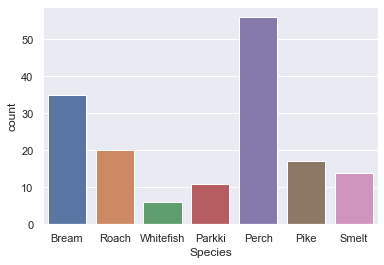

In [9]:
sns.countplot(x = dataset['Species'])

<AxesSubplot:xlabel='Species', ylabel='Height'>

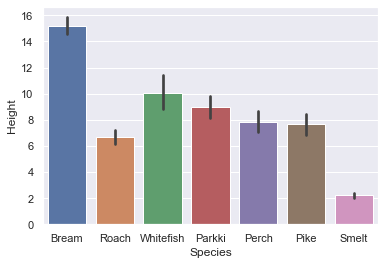

In [10]:
sns.barplot(y = dataset['Height'], x = dataset['Species'])

#### 2. Please check Pairwise Relationships in a Dataset using Pairplot

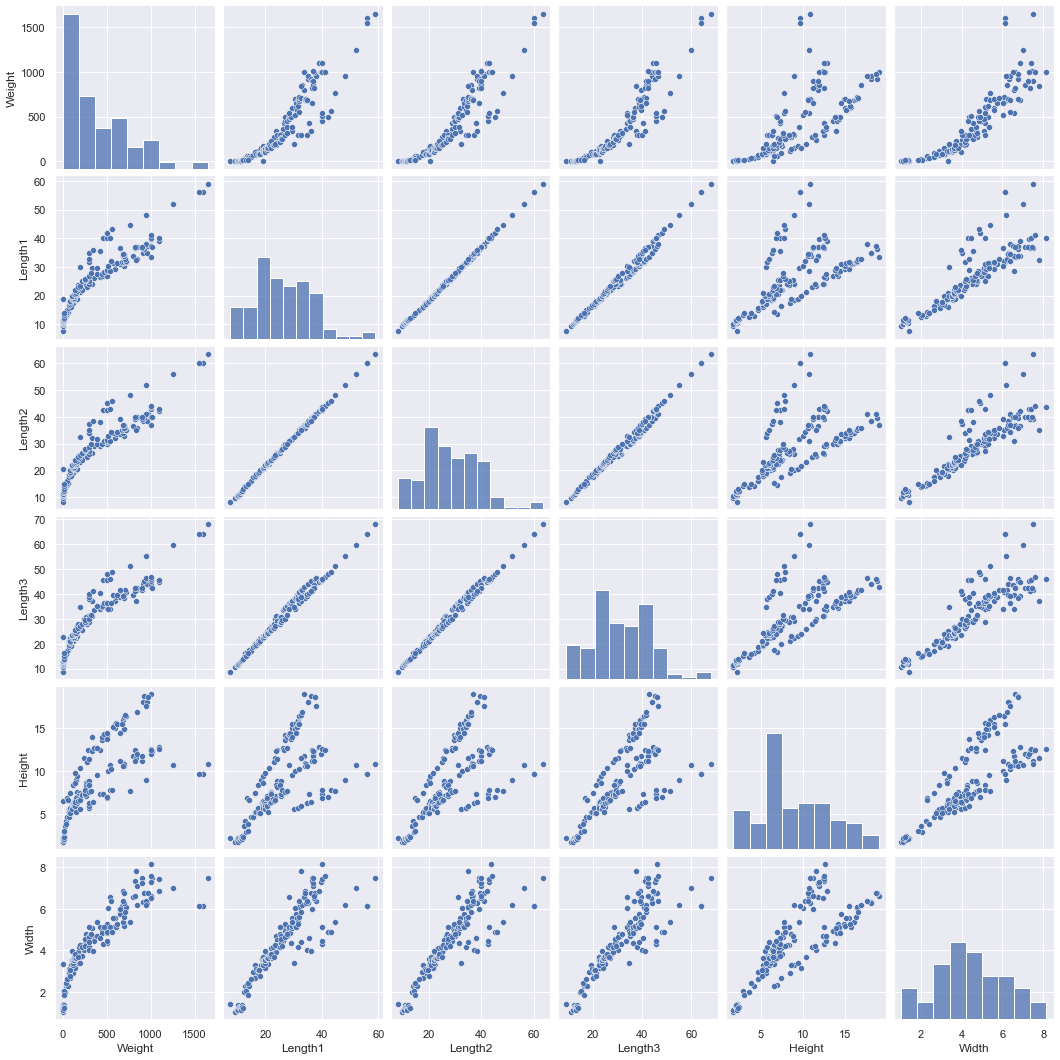

In [11]:
sns.pairplot(dataset)

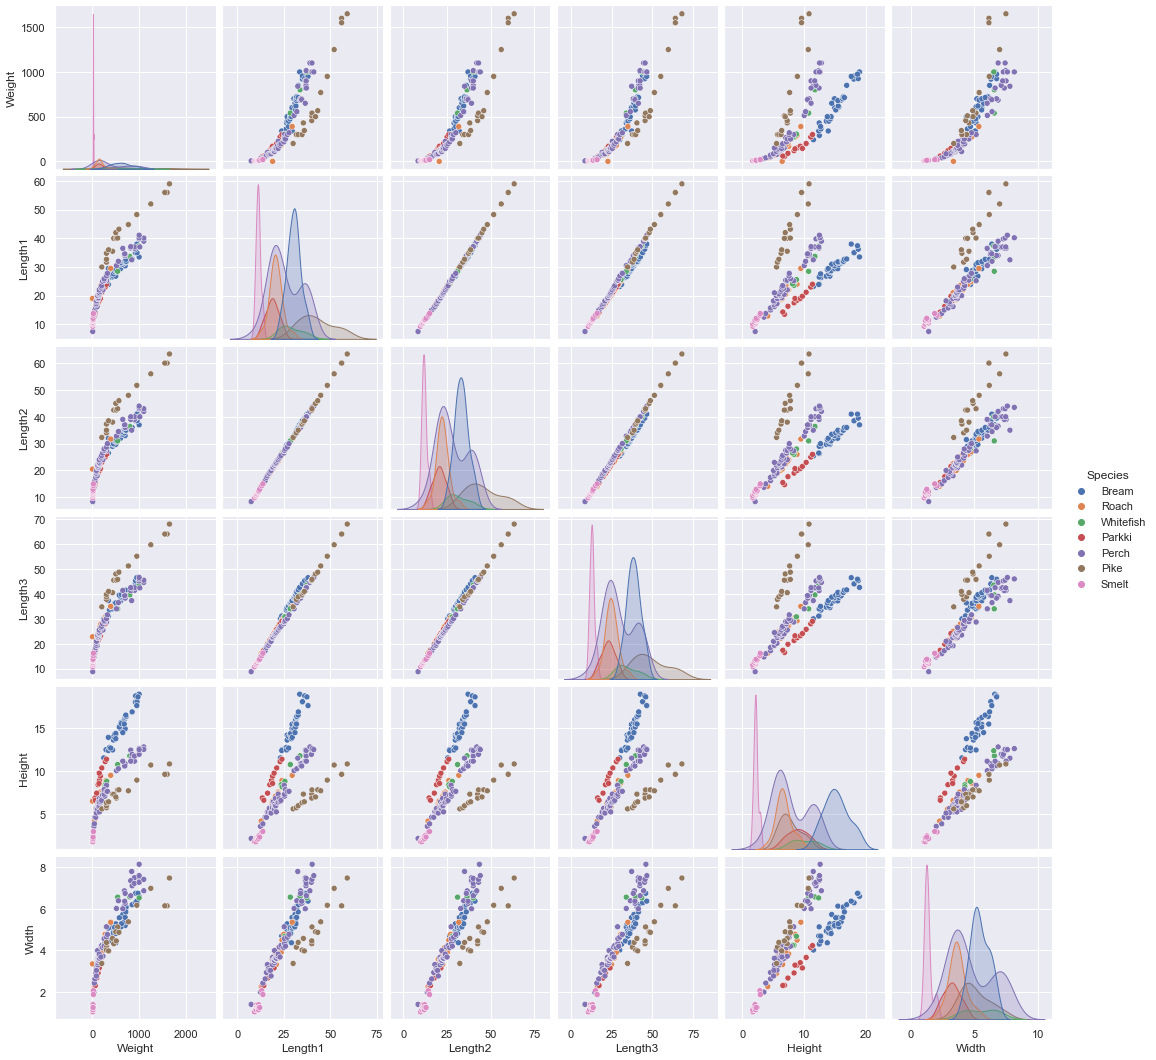

In [12]:
sns.pairplot(dataset, hue = "Species")

#### 3. Prepared Training and Test Dataset

###### Extract Independent and Dependent Variable

In [13]:
x = pd.DataFrame(dataset.iloc[:, 0])
y = pd.DataFrame(dataset.iloc[:, 1])

#### Encode Species Column

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
onehot_encoder = OneHotEncoder()
x = pd.DataFrame(onehot_encoder.fit_transform(x).toarray())

#### Give Name The Column According Encoded Species Column

In [15]:
columns_name = dataset['Species'].sort_values().unique()
x.columns = columns_name

In [16]:
x = dataset.iloc[:, [5, 6]].join(x)

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
x_train

,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
143,9.6000,6.1440,0.0,0.0,0.0,1.0,0.0,0.0,0.0
130,5.9364,4.3844,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16,14.8604,5.2854,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,7.2930,3.7230,0.0,0.0,1.0,0.0,0.0,0.0,0.0
107,7.5852,4.6354,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9,14.2266,4.9594,1.0,0.0,0.0,0.0,0.0,0.0,0.0
103,7.1672,4.3350,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67,9.3960,3.4104,0.0,1.0,0.0,0.0,0.0,0.0,0.0
117,11.1366,6.0030,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
y_train

,Weight
143,1550.0
130,300.0
16,700.0
96,225.0
107,300.0
...,...
9,500.0
103,260.0
67,170.0
117,650.0


In [26]:
x_test

,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
7,12.6700,4.6900,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40,6.4752,3.3516,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95,6.2750,3.7250,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45,7.0334,3.8203,0.0,0.0,0.0,0.0,1.0,0.0,0.0
110,10.2565,6.3875,0.0,0.0,1.0,0.0,0.0,0.0,0.0
120,11.7300,7.2250,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59,11.7612,6.5736,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131,6.2884,4.0198,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33,18.6354,6.7473,1.0,0.0,0.0,0.0,0.0,0.0,0.0
83,5.9175,3.3075,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
y_test

,Weight
7,390.0
40,0.0
95,170.0
45,160.0
110,556.0
120,900.0
59,800.0
131,300.0
33,975.0
83,115.0


In [22]:
dataset.shape

(159, 7)

#### 4. Predict Weight Fish each Species

In [28]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_train_new = model.predict(x_train)
y_test_new = model.predict(x_test)

In [37]:
print(y_train_new)

[[ 8.93322440e+02]
 [ 4.87576814e+02]
 [ 5.83073318e+02]
 [ 2.69310925e+02]
 [ 3.58412774e+02]
 [ 6.32656063e+02]
 [ 7.41305095e+02]
 [ 1.47767616e+02]
 [ 6.44490083e+02]
 [-8.73130174e+01]
 [ 2.07541679e+02]
 [ 7.49672223e+02]
 [ 1.14934671e+02]
 [ 2.52001777e+02]
 [ 2.11077601e+02]
 [ 2.90819713e+02]
 [ 6.30226526e+02]
 [ 3.70716218e+02]
 [ 8.97777039e+02]
 [-1.41454561e+02]
 [ 1.03481600e+01]
 [ 3.52445538e+02]
 [ 5.62498085e+01]
 [ 1.03198354e+02]
 [ 3.64518650e+02]
 [ 5.24665995e+02]
 [-1.00363956e+01]
 [ 6.03827370e+02]
 [-3.02279814e+00]
 [-1.97054686e+01]
 [ 8.19040172e+01]
 [ 1.61384727e+02]
 [ 1.05655732e+02]
 [-4.55615768e+01]
 [ 1.03708648e+03]
 [ 9.34580485e+02]
 [ 7.72842643e+02]
 [ 2.50739549e+02]
 [ 2.59630151e+02]
 [ 2.24233411e+02]
 [ 4.32779641e+01]
 [ 9.23669370e+02]
 [ 3.44469239e+02]
 [ 2.45470855e+02]
 [ 1.77956819e+02]
 [ 2.39662003e+02]
 [ 4.95957465e+02]
 [ 6.63274637e+02]
 [ 6.91079489e+02]
 [ 8.85177853e+02]
 [ 6.24181392e+02]
 [ 6.48305643e+02]
 [ 6.7262143

In [36]:
print(y_test_new)

[[ 374.04448304]
 [ 124.20161475]
 [ 192.64716488]
 [ 200.76521194]
 [ 688.73559208]
 [ 861.46500412]
 [ 661.25826567]
 [ 487.34074648]
 [ 975.34563195]
 [ 134.98972265]
 [ 385.64079586]
 [ 584.4057373 ]
 [ 702.4148285 ]
 [ 994.8032406 ]
 [-138.05065158]
 [  23.45859006]
 [ 150.5951798 ]
 [ 893.32243996]
 [ 186.83442178]
 [ 755.48995246]
 [-116.75185579]
 [ 498.53381429]
 [ 156.86360258]
 [1082.95703181]
 [ -49.20677408]
 [ 486.06931087]
 [ 709.51778645]
 [ 217.55923904]
 [ 867.73367424]
 [  13.36427378]
 [ 586.40174702]
 [ 155.7120718 ]]


#### 5. Plot with Scatter of Predict Result

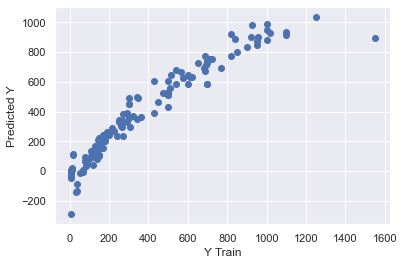

In [38]:
plt.scatter(y_train, y_train_new)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')
plt.show()

### End of Code